In [141]:
# importing necessary packages
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
# read the data
df = pd.read_csv('data/multiTimeline.csv.txt', skiprows=1)

In [18]:
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [19]:
# checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [20]:
# renaming columns
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [23]:
# turining the month column into a dateTime data type
df.month = pd.to_datetime(df.month)

In [24]:
df.set_index('month', inplace=True)

In [26]:
# the month( dateTime data type) is now the index
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


Text(0,0.5,'Peak Populariy')

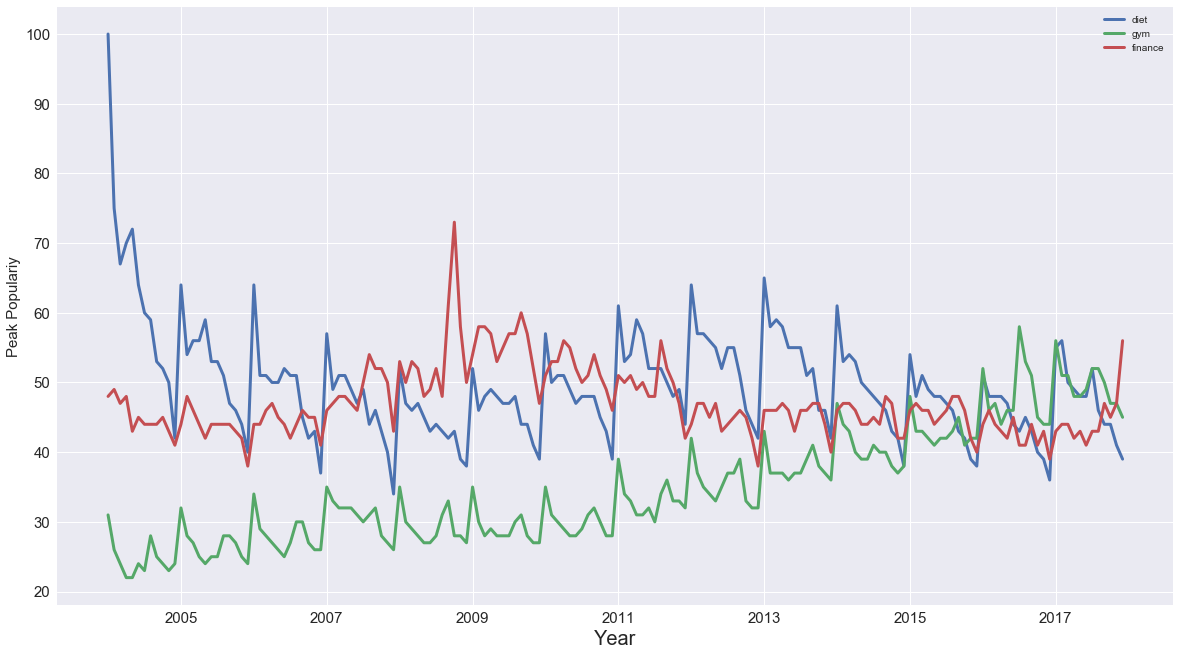

In [53]:
# visalizing different features of the data-frame
df.plot(figsize=(20,11), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Peak Populariy', fontsize=15)

In [100]:
# Identifying Trends in Time Series
diet = df[['diet']]
diet.head()

,diet
month,
2004-01-01,100
2004-02-01,75
2004-03-01,67
2004-04-01,70
2004-05-01,72


Text(0,0.5,'Peak Populariy')

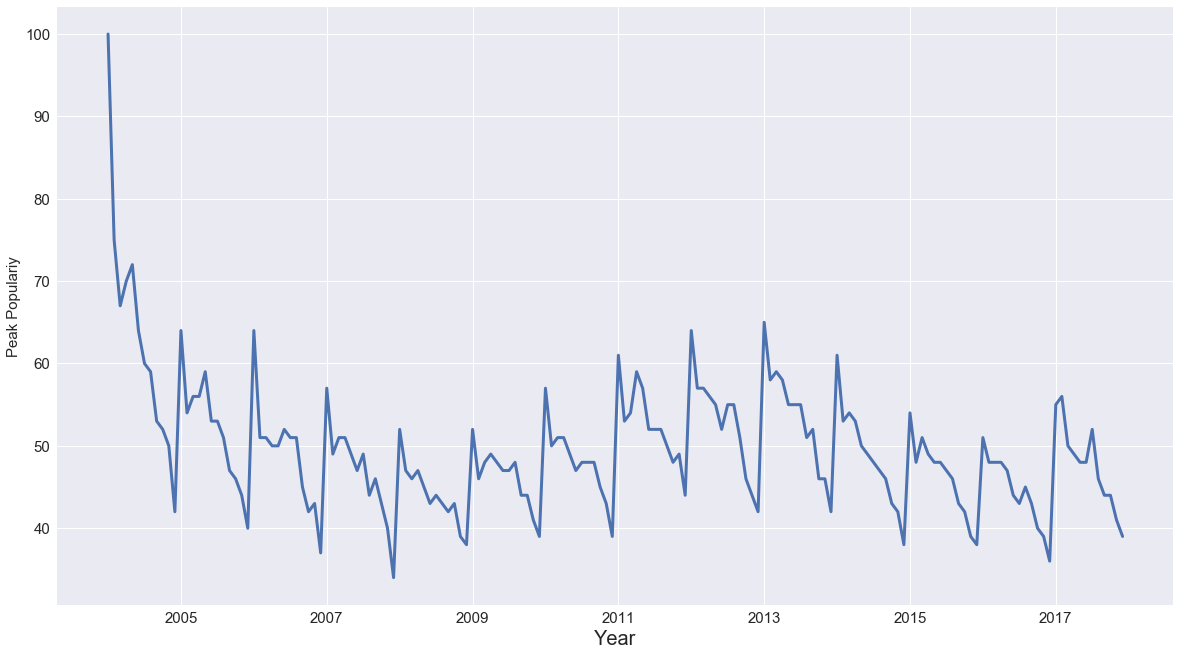

In [54]:
df.diet.plot(figsize=(20,11), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Peak Populariy', fontsize=15)

Text(0,0.5,'Peak Populariy')

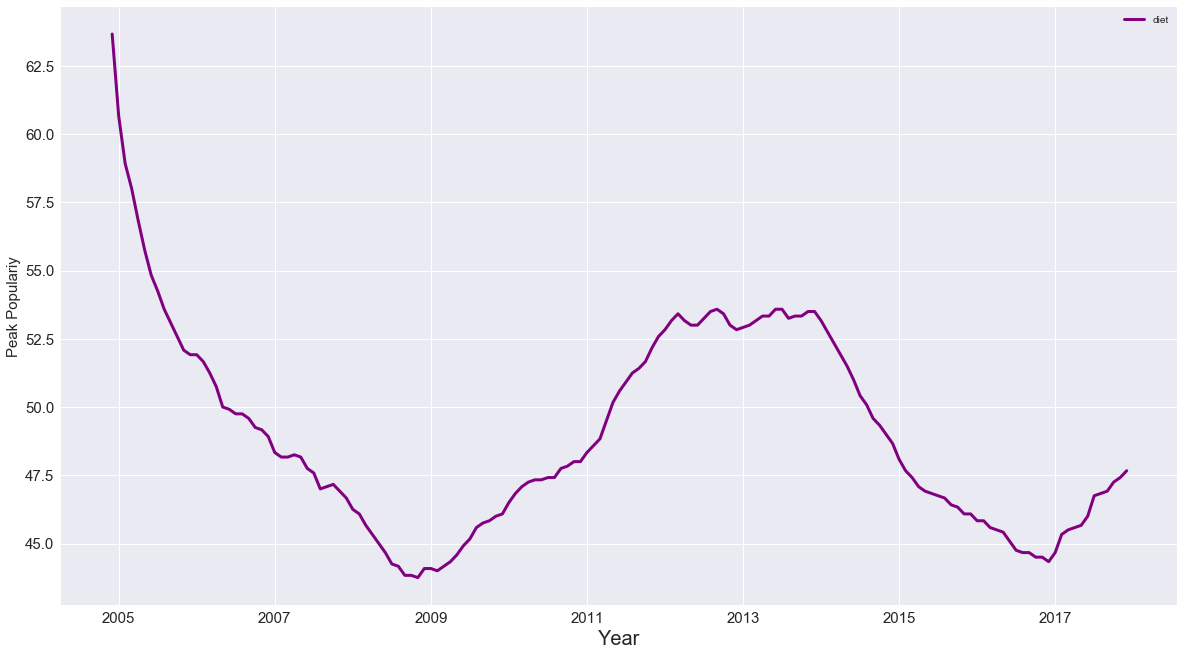

In [104]:
diet.rolling(12).mean().plot(figsize=(20,11), linewidth=3, fontsize=15, color ='purple')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Peak Populariy', fontsize=15)

In [105]:
gym = df[['gym']]
gym.head()

,gym
month,
2004-01-01,31
2004-02-01,26
2004-03-01,24
2004-04-01,22
2004-05-01,22


Text(0,0.5,'Peak Populariy')

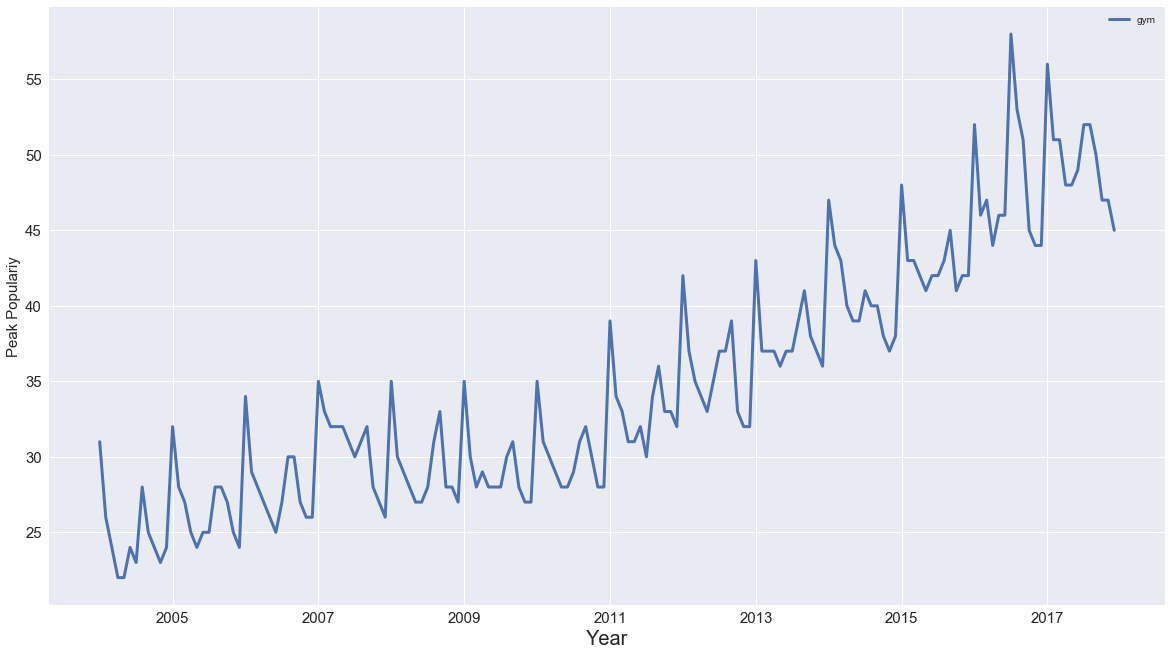

In [109]:
gym.plot(figsize=(20,11), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Peak Populariy', fontsize=15)

Text(0,0.5,'Peak Populariy')

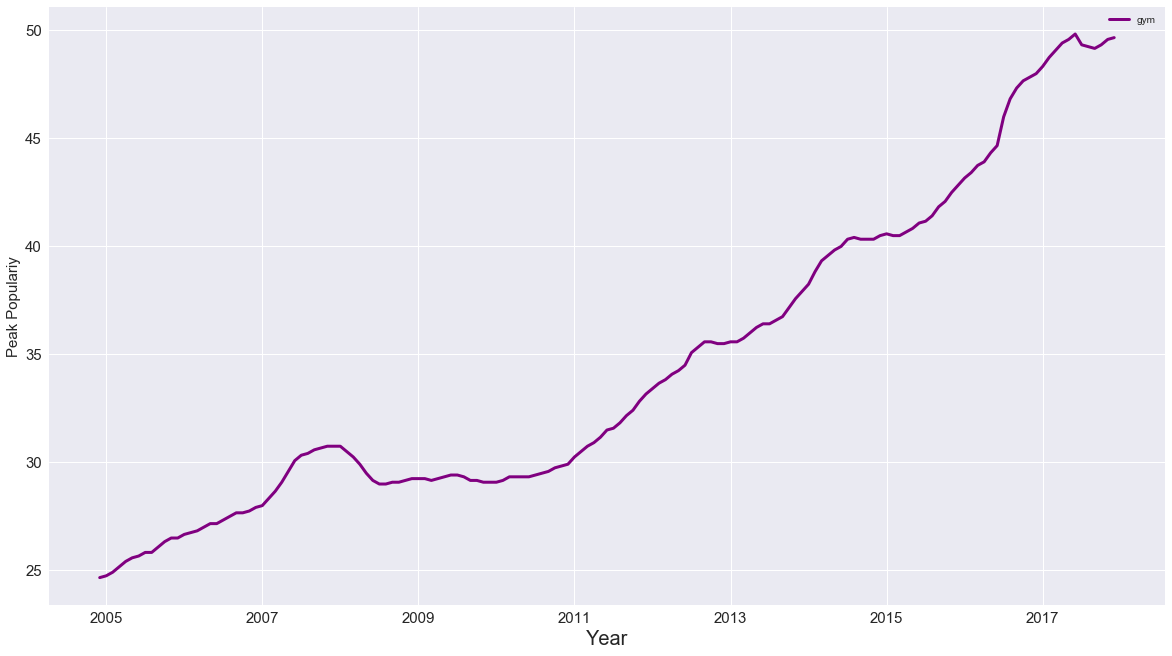

In [108]:
gym.rolling(12).mean().plot(figsize=(20,11), linewidth=3, fontsize=15, color ='purple')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Peak Populariy', fontsize=15)

Text(0,0.5,'Peak Populariy')

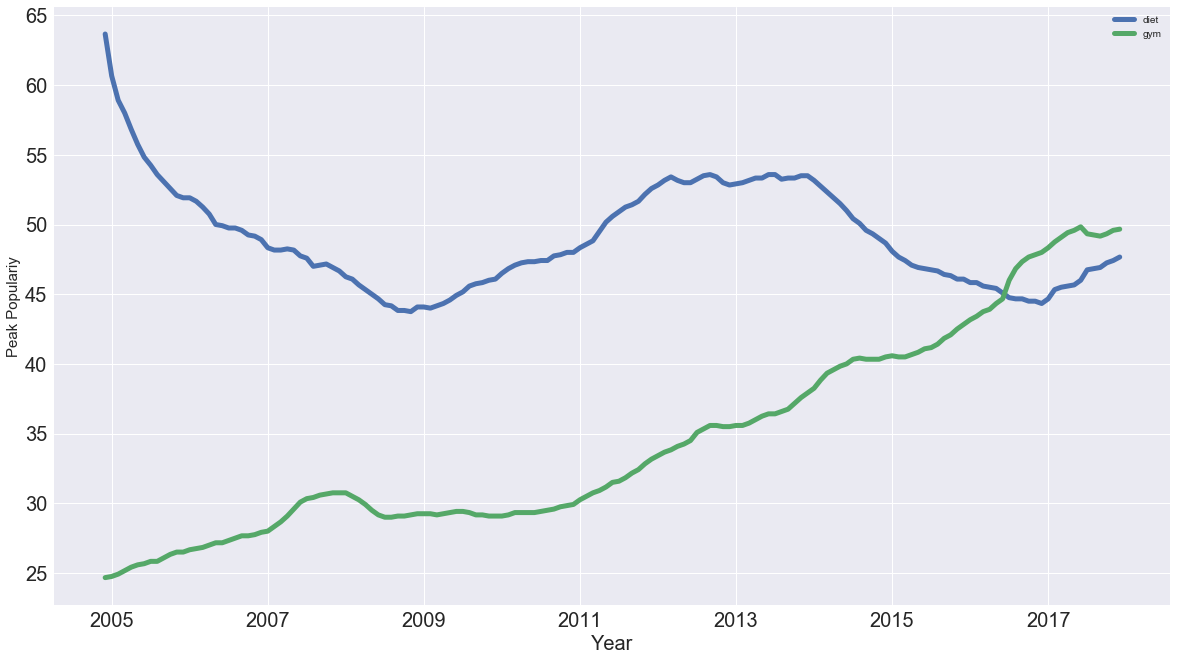

In [111]:
# concating the seasonal trend of 'diet' and 'gym'
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,11), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Peak Populariy', fontsize=15)

Text(0,0.5,'Seasonality of Popularity')

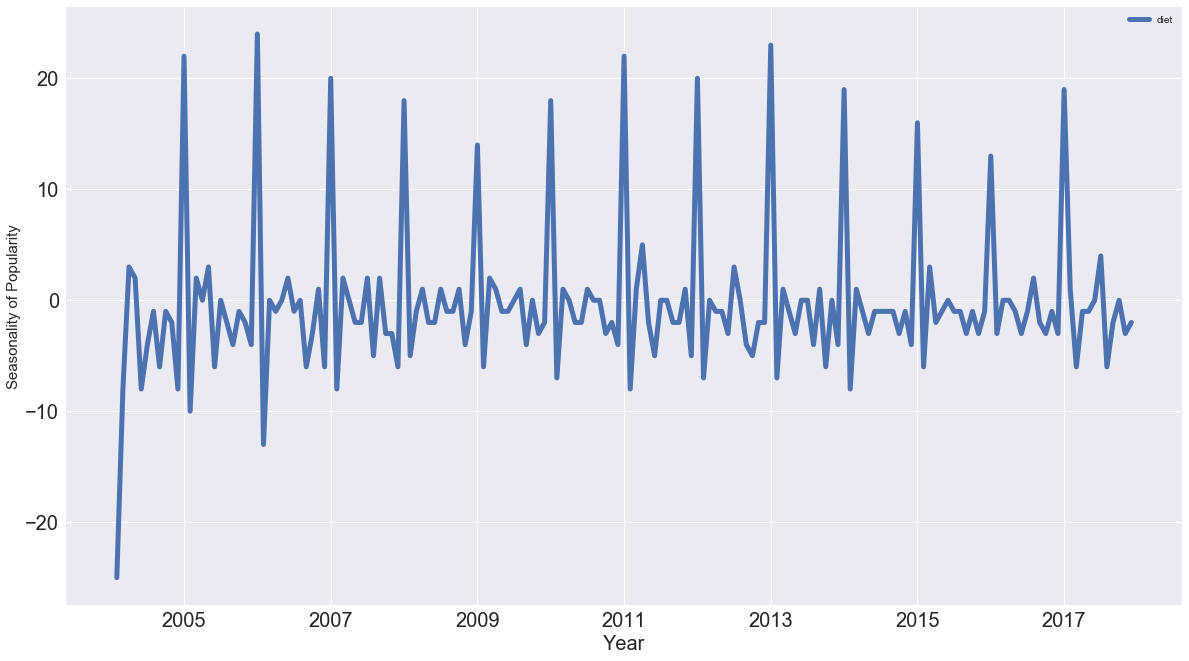

In [113]:
# First-Order differencing
diet.diff().plot(figsize=(20,11), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Seasonality of Popularity', fontsize=15)

Text(0,0.5,'Seasona4ity of Popularity')

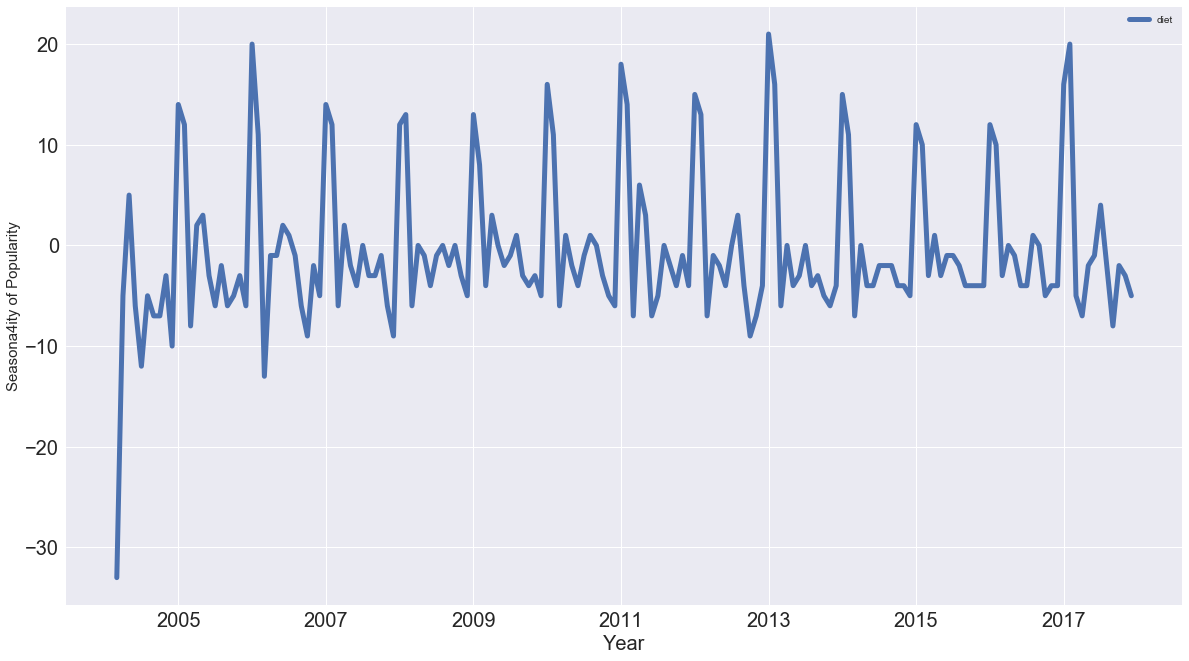

In [144]:
# First-Order differencing
diet.diff(2).plot(figsize=(20,11), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Seasona4ity of Popularity', fontsize=15)

Text(0,0.5,'Peak Populariy')

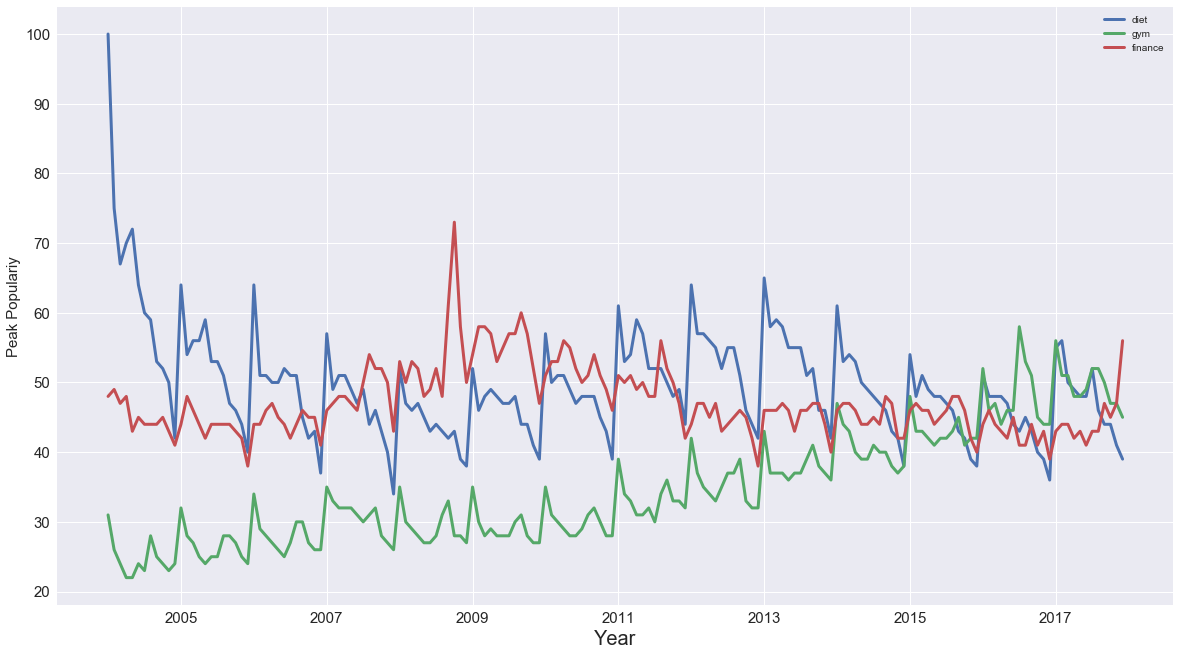

In [145]:
# visalizing different features of the data-frame
df.plot(figsize=(20,11), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Peak Populariy', fontsize=15)

In [151]:
# correlation and periodicity

In [152]:
# diet and gym are negatively correlated
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


Text(0,0.5,'Seasonality of Popularity')

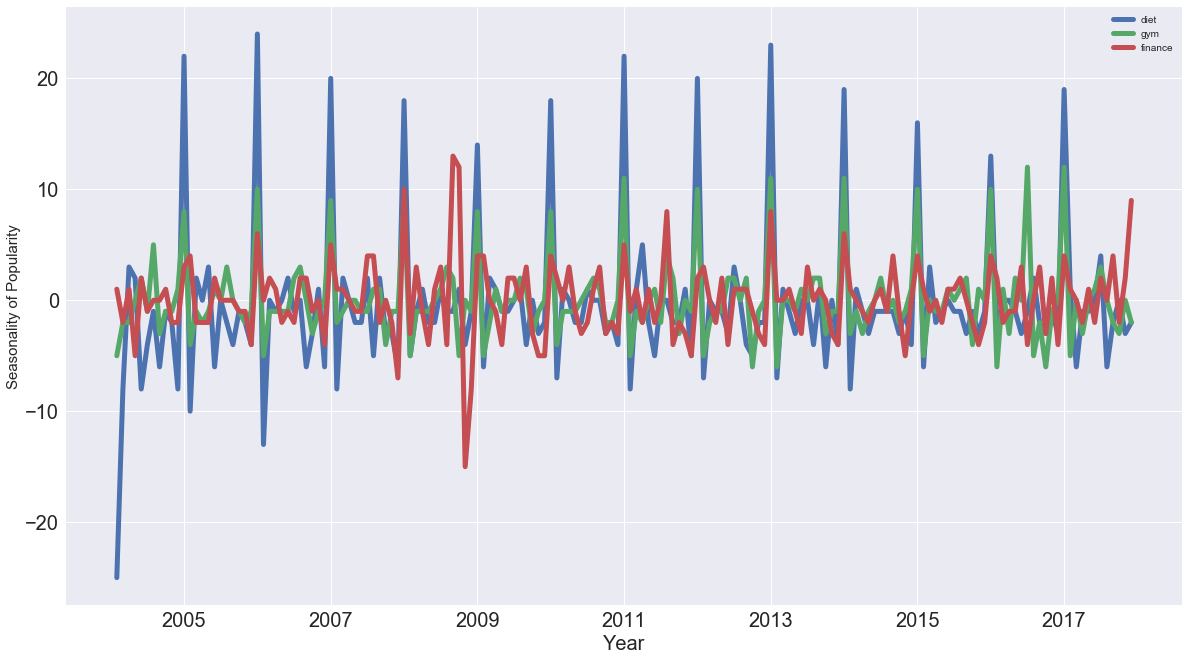

In [149]:
df.diff().plot(figsize=(20,11), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Seasonality of Popularity', fontsize=15)

In [153]:
# After removing the trend, diet and gym are incredibly correlated
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


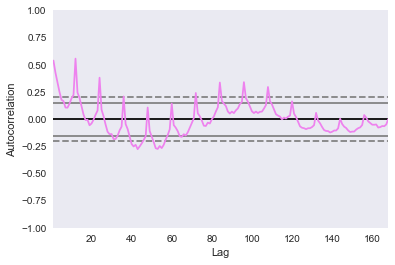

In [166]:
# Autocorrelation
pd.plotting.autocorrelation_plot(diet, color='violet')